# Tableaux de bord

Ce notebook propose des visualisations avancées et des indicateurs de performance pour le projet BI.

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Créer le dossier d'export si nécessaire
os.makedirs('../generated/graphs', exist_ok=True)
#Volume par type de matière genéré
faits_matieres = pd.read_csv('../generated/faits_matieres.csv')

# Conversion de la colonne générée en numérique (si ce n'est pas déjà fait)
if 'quantite_generee_donnees_agglo_num' not in faits_matieres.columns:
    faits_matieres['quantite_generee_donnees_agglo_num'] = (
        faits_matieres['quantite_generee_donnees_agglo']
        .astype(str)
        .str.replace(r'[^\d.,]', '', regex=True)
        .str.replace('\xa0', '', regex=False)
        .str.replace(',', '', regex=False)
    )
    faits_matieres['quantite_generee_donnees_agglo_num'] = pd.to_numeric(
        faits_matieres['quantite_generee_donnees_agglo_num'], errors='coerce'
    )

# Conversion de la colonne collectée en numérique (comme pour la colonne générée)
faits_matieres['quantite_collectee_donnees_agglo_num'] = (
    faits_matieres['quantite_collectee_donnees_agglo']
    .astype(str)
    .str.replace(r'[^\d.,]', '', regex=True)
    .str.replace('\xa0', '', regex=False)
    .str.replace(',', '', regex=False)
)
faits_matieres['quantite_collectee_donnees_agglo_num'] = pd.to_numeric(
    faits_matieres['quantite_collectee_donnees_agglo_num'], errors='coerce'
)

In [ ]:
# Croisement type de matière x territoire (producteur) x volume
import numpy as np
pivot = faits_matieres.pivot_table(
    index='matiere',
    columns='territoire',
    values='quantite_generee_donnees_agglo',
    aggfunc='sum',
    fill_value=0
)

# Croisement type de matière x territoire (producteur) x volume collecté
pivot = faits_matieres.pivot_table(
    index='matiere',
    columns='territoire',
    values='quantite_generee_donnees_agglo_num',
    aggfunc='sum',
    fill_value=0
)

plt.figure(figsize=(18,8))
sns.heatmap(pivot, annot=False, cmap='YlGnBu', linewidths=0.5)
plt.title('Volume collecté par type de matière et territoire (producteur)')
plt.xlabel('Territoire (producteur)')
plt.ylabel('Type de matière')
plt.tight_layout()
plt.savefig('../generated/graphs/heatmap_type_territoire_volume_collecte.png')
plt.show()

In [ ]:
# KPI : Volume total par producteur
# Utiliser la colonne numérique nettoyée pour l'agrégation
total_volume_producteur = faits_matieres.groupby('territoire')['quantite_collectee_donnees_agglo_num'].sum(min_count=1).sort_values(ascending=False)
print("Volume total par producteur :")
print(total_volume_producteur)

plt.figure(figsize=(10,5))
sns.barplot(x=[t[:20] + '…' if len(t) > 20 else t for t in total_volume_producteur.index], y=total_volume_producteur.values)
plt.xticks(rotation=45)
plt.title('Volume total par producteur')
plt.tight_layout()
plt.savefig('../generated/graphs/volume_par_producteur.png')
plt.show()






In [ ]:


# Agrégation par année en ignorant les valeurs nulles (inexistantes)
total_generee = faits_matieres.groupby('annee')['quantite_generee_donnees_agglo_num'].sum(min_count=1)
total_collectee = faits_matieres.groupby('annee')['quantite_collectee_donnees_agglo_num'].sum(min_count=1)

# Fusion dans un DataFrame
df_periode = pd.DataFrame({
    'Quantité générée': total_generee,
    'Quantité collectée': total_collectee
}).sort_index(ascending=True)

print(df_periode)

# Visualisation
plt.figure(figsize=(10,5))
df_periode.plot(kind='bar')
plt.title('Volume total généré vs collecté par période')
plt.ylabel('Tonnes')
plt.tight_layout()
plt.savefig('../generated/graphs/volume_genere_vs_collecte_par_periode.png')
plt.show()

Top 5 types de matières par volume :
matiere
Matières organiques                                               13017079.0
Matières recyclables                                              11108746.0
Résidus de construction, rénovation, démolition et encombrants     8952549.0
Résidus domestiques dangereux                                       128431.0
Autres (produits électroniques)                                          0.0
Name: quantite_generee_donnees_agglo_num, dtype: float64


/tmp/ipykernel_55248/4086872390.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


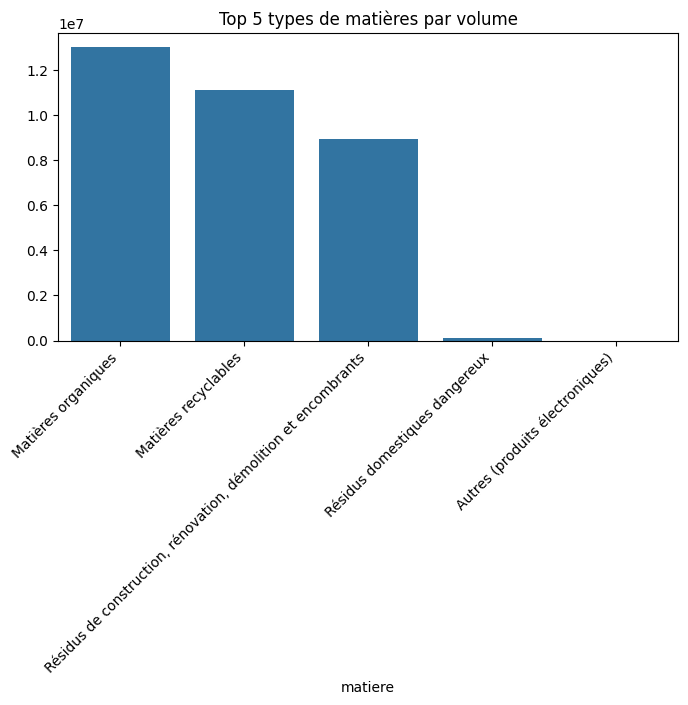

In [7]:
# KPI : Top 5 types de matières par volume
top5_matieres = faits_matieres.groupby('matiere')['quantite_generee_donnees_agglo_num'].sum().sort_values(ascending=False).head(5)
print("Top 5 types de matières par volume :")
print(top5_matieres)

plt.figure(figsize=(8,4))
sns.barplot(x=top5_matieres.index, y=top5_matieres.values)
plt.xticks(rotation=45, ha='right')
plt.title('Top 5 types de matières par volume')
plt.tight_layout()
plt.savefig('../generated/graphs/top5_types_matiere.png')
plt.show()


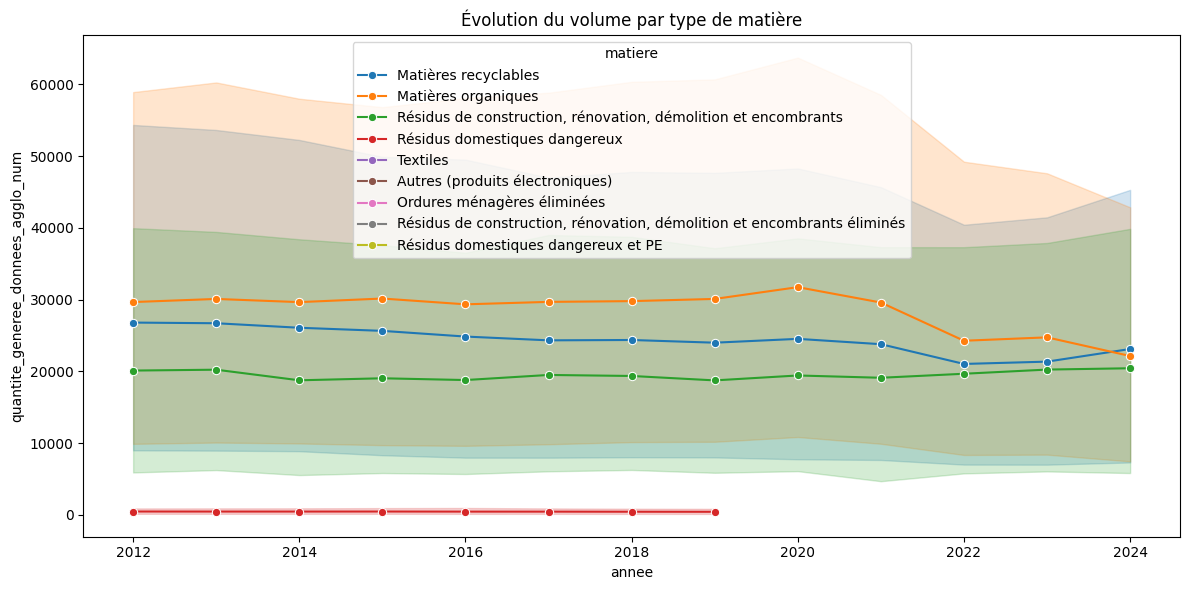

In [5]:
# Évolution du volume par type de matière au fil des années
plt.figure(figsize=(12,6))
sns.lineplot(data=faits_matieres, x='annee', y='quantite_generee_donnees_agglo_num', hue='matiere', marker='o')
plt.title('Évolution du volume par type de matière')
plt.tight_layout()
plt.savefig('../generated/graphs/evolution_volume_type_matiere.png')
plt.show()






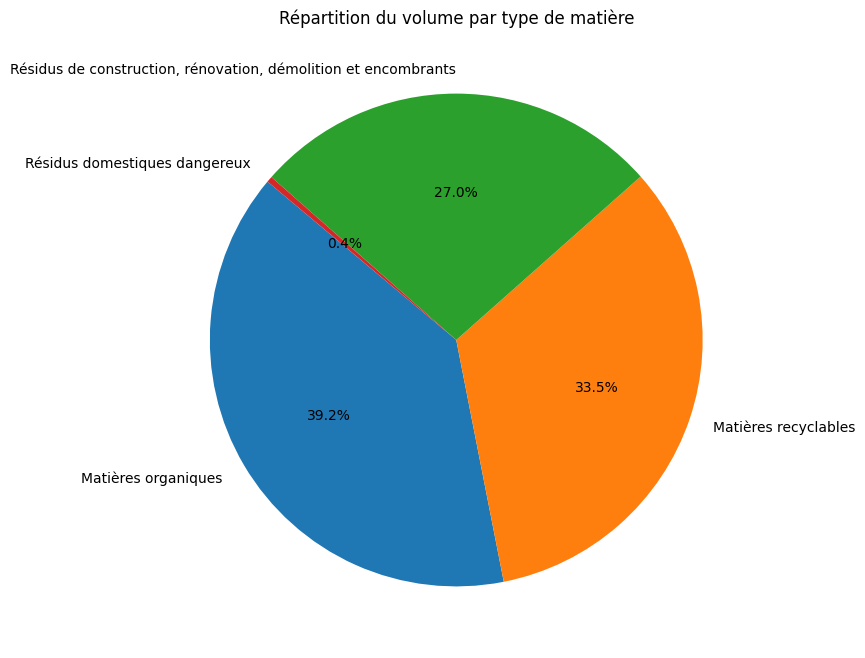

In [3]:
# Répartition (%) par type de matière (pie chart)
# Nettoyage et conversion en numérique
faits_matieres['quantite_generee_donnees_agglo_num'] = (
	faits_matieres['quantite_generee_donnees_agglo']
	.astype(str)
	.str.replace(r'[^\d.,]', '', regex=True)
	.str.replace('\xa0', '', regex=False)  # remove non-breaking spaces
	.str.replace(',', '', regex=False)     # remove commas if used as thousands separator
)
faits_matieres['quantite_generee_donnees_agglo_num'] = pd.to_numeric(
	faits_matieres['quantite_generee_donnees_agglo_num'], errors='coerce'
)

volumes = faits_matieres.groupby('matiere')['quantite_generee_donnees_agglo_num'].sum()
volumes = volumes[volumes > 0]  # Optionally, remove zero or NaN values

plt.figure(figsize=(8,8))
plt.pie(volumes, labels=volumes.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition du volume par type de matière')
plt.savefig('../generated/graphs/repartition_volume_type_matiere.png')
plt.show()


Valeurs manquantes par colonne:
annee                                      0
matiere                                    0
territoire                                 0
quantite_generee_donnees_agglo          1913
quantite_collectee_donnees_agglo           0
taux_recuperation_donnees_agglo         1884
ratio_recuperation_donnees_agglo         485
quantite_generee_donnees_CMM            3245
quantite_collectee_donnees_CMM          2744
taux_recuperation_donnees_CMM           3214
ratio_recuperation_donnees_CMM          2932
latitude                                  29
longitude                                 29
quantite_generee_donnees_agglo_num      1913
quantite_collectee_donnees_agglo_num       0
dtype: int64


/tmp/ipykernel_55248/3528804302.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


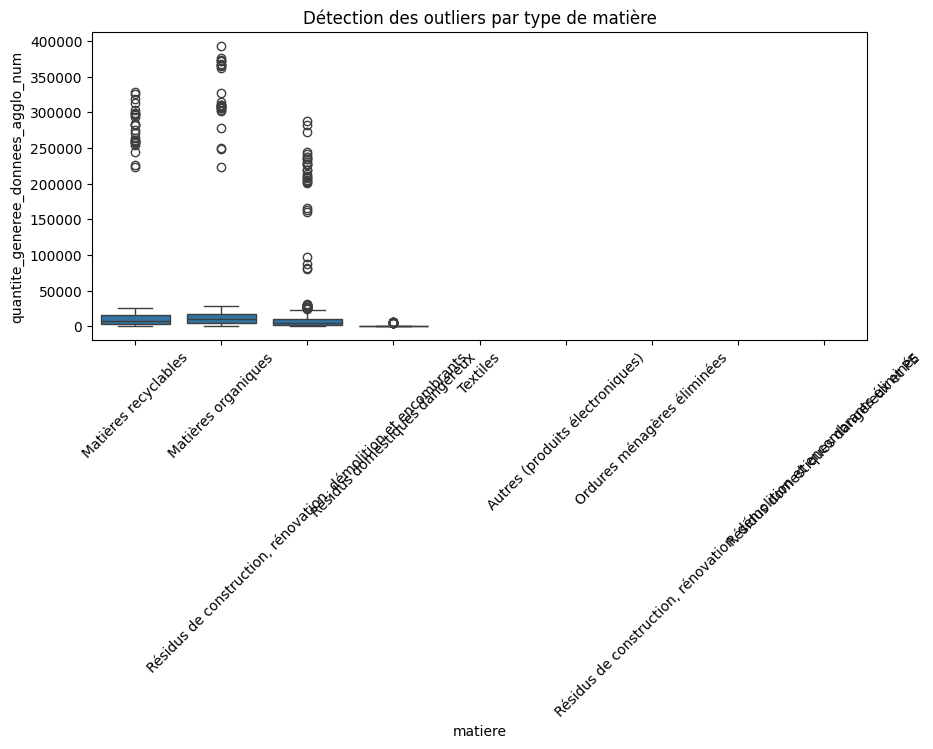

Aperçu interactif des faits:


,annee,matiere,territoire,quantite_generee_donnees_agglo,quantite_collectee_donnees_agglo,taux_recuperation_donnees_agglo,ratio_recuperation_donnees_agglo,quantite_generee_donnees_CMM,quantite_collectee_donnees_CMM,taux_recuperation_donnees_CMM,ratio_recuperation_donnees_CMM,latitude,longitude,quantite_generee_donnees_agglo_num,quantite_collectee_donnees_agglo_num
0,2012,Matières recyclables,Agglomération de Montréal,327875,173046,58%,89,NaN,NaN,NaN,NaN,45.550585,-73.602232,327875.0,173046
1,2012,Matières recyclables,Ville de Montréal,282555,146829,57%,86,NaN,NaN,NaN,NaN,45.508838,-73.554142,282555.0,146829
2,2012,Matières recyclables,Ahuntsic-Cartierville,20303,9912,54%,75,NaN,NaN,NaN,NaN,45.541862,-73.680319,20303.0,9912
3,2012,Matières recyclables,Anjou,6554,3063,51%,71,NaN,NaN,NaN,NaN,45.604898,-73.546672,6554.0,3063
4,2012,Matières recyclables,Baie-d'Urfé,961,593,68%,153,NaN,NaN,NaN,NaN,45.417426,-73.915364,961.0,593
5,2012,Matières recyclables,Beaconsfield,4486,2524,62%,126,NaN,NaN,NaN,NaN,45.428977,-73.865439,4486.0,2524
6,2012,Matières recyclables,Côte-des-Neiges–Notre-Dame-de-Grâce,25778,13463,57%,79,NaN,NaN,NaN,NaN,45.482100,-73.624964,25778.0,13463
7,2012,Matières recyclables,Côte-Saint-Luc,4600,2309,55%,70,NaN,NaN,NaN,NaN,45.477272,-73.663752,4600.0,2309
8,2012,Matières recyclables,Dollard-Des Ormeaux,8505,4460,58%,89,NaN,NaN,NaN,NaN,45.484230,-73.806455,8505.0,4460
9,2012,Matières recyclables,Dorval,3492,2031,64%,107,NaN,NaN,NaN,NaN,45.445308,-73.751089,3492.0,2031


In [8]:
# Analyse des valeurs manquantes et outliers
print('Valeurs manquantes par colonne:')
print(faits_matieres.isnull().sum())
plt.figure(figsize=(10,4))
sns.boxplot(data=faits_matieres, x='matiere', y='quantite_generee_donnees_agglo_num')
plt.xticks(rotation=45)
plt.title('Détection des outliers par type de matière')
plt.tight_layout()
plt.savefig('../generated/graphs/outliers_type_matiere.png')
plt.show()

# Tableau interactif (si Jupyter/IPython)
from IPython.display import display
print('Aperçu interactif des faits:')
display(faits_matieres.head(20))